# History on Demand - Direct API

## Overview

The History on Demand (HoD) APIs provide access to global, historical weather data. Historical weather data is prevalent in trend analysis and the training of analytical models pertaining to energy, agriculture, insurance and many other industries. These APIs allows you to collect that data the way that works best for you. Each has its own style of interaction, allowable query types, delivery mode, and restrictions. Select the API that suits your usage style, desired data format and delivery mechanism.

The History on Demand (HoD) - Direct API provides historical (and, in one case, forecast) weather data. Currently, the datasets served are the "Gridded Currents on Demand" (gCOD) dataset, the "Agriculture and Energy" (AgE) dataset. HoD Direct is a synchronous API that allows users to examine hourly gCOD and AGE data. Users specify the geospatial and the temporal facets of the query in the URL, and the data is returned in the response.  The API implements paging, so that no single request takes excessively long to come back. It also allows for the specification of a geolocation in multiple formats. The format of the data in a successful response is dictated by the format specified in the request. The format of all other responses (request validation errors, etc.) is json.

This Notebook will demonstrate the usage of History on Demand (HoD) - Direct API.

## Setup

All of the documentation and samples we provide are built using Jupyter notebooks.

To run the notebooks, below are the basic requirements:

1. A Python3.7 or higher environment
2. A Jupyter Notebook environment
Note: The notebooks include runnable examples but you need to run them in order from top to bottom. This is because there are some lines of set up code, for example, setting authentication credentials, that only appear in the first code cell. We leave them out in the subsequent cells to avoid clutter.

To run this notebook seamlessly, you have to first configure your EI API credentials in a file named `secrets.ini` in the below format:

```
[EI]
api.api_key = <Your EI API key>
api.org_id = <Your EI Org Id>
api.tenant_id = <Your EI Tenant Id>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the below config.

```config.read('../../auth/secrets.ini')```

Execute this notebook, cell after cell

## History on Demand - Direct API Sample

Let us start with the initial imports required for calling the HOD APIs

In [1]:
import requests
from pprint import pprint
import pandas as pd
import configparser
from io import StringIO
import json
from pandas import json_normalize
from datetime import datetime
import matplotlib.pyplot as plt

Now, we will set up the API Credentials as listed in below code

In [2]:
config = configparser.RawConfigParser()
config.read('../../auth/secrets.ini')

# The below line is written so that the table's data won't get truncated.
pd.set_option('display.max_colwidth', None)

EI_API_KEY     = config.get('EI', 'api.api_key')
EI_ORG_ID     = config.get('EI', 'api.org_id') 
EI_TENANT_ID     = config.get('EI', 'api.tenant_id')

EI_AUTH_ENDPOINT = "https://api.ibm.com/saascore/run/authentication-retrieve"
EI_API_BASE_URL  = "https://api.ibm.com/geospatial/run/v3/wx"
EI_API_ENDPOINT  = f"{EI_API_BASE_URL}/hod/r1/direct"

EI_AUTH_CLIENT_ID  = 'saascore-' + EI_TENANT_ID
EI_CLIENT_ID = 'geospatial-' + EI_TENANT_ID

auth_request_headers: dict = {}
auth_request_headers["X-IBM-Client-Id"] = EI_AUTH_CLIENT_ID
auth_request_headers["X-API-Key"] = EI_API_KEY

verify = True

auth_url = f"{EI_AUTH_ENDPOINT}/api-key?orgId={EI_ORG_ID}"
              
response = requests.get(url = auth_url,
                        headers = auth_request_headers,
                        verify  = verify
                       )
if response.status_code == 200:
    jwt_token = response.text
    print("Authentication Success")
else:     
    print("Authentication Failed")
    print(response.text)

Authentication Success


Once the API credentials are setup, we will build the required query parameters and headers for making an HOD Direct API call. 
With the query parameters and the headers setup, we will send an HTTP GET Request to the HOD Direct API Endpoint and get back the response.
This API response is a JSON structure that will be displayed.

In [3]:
# Create the query parameter
# provide the geocode cordinates, startdatetime, enddatatime, format as json, units as per your requirements to get data
query_params: dict = {}
query_params["geocode"] = "40.77521,-73.975153"
query_params["startDateTime"] = "2023-06-07T00"
query_params["endDateTime"] = "2023-07-07T23"
query_params["format"] = "json"
query_params["units"] = "e"
query_params["compact"] = "false"

# Create the query headers
query_request_headers: dict = {}
query_request_headers["x-ibm-client-id"] = EI_CLIENT_ID
query_request_headers["Authorization"] = "Bearer " + jwt_token

# Create the Request object as GET Request with host URL, query parameters and query headers
request = requests.Request('GET', EI_API_ENDPOINT, params=query_params, headers=query_request_headers)
 
# Create a Session object and send the request
session = requests.Session()
response = session.send(request.prepare())

if response.text != "":
    # Get the response as json
    response_json = response.json()
    
    # Get json and convert to dataframe
    json_str = json.dumps(response_json)
    dict = json.loads(json_str)
    dataframe = json_normalize(dict) 
    
    # display
    #pprint(response_json)
    print("\n\n")
    pd.set_option('display.max_colwidth', None)
    display( dataframe) 
else:
    print("Empty Response")

,requestedLatitude,requestedLongitude,latitude,longitude,gridpointId,validTimeUtc,drivingDifficultyIndex,iconCode,iconCodeExtended,precip1Hour,...,temperatureChange24Hour,temperatureMax24Hour,temperatureMin24Hour,temperatureDewPoint,temperatureFeelsLike,uvIndex,visibility,windDirection,windSpeed,windGust
0,40.77521,-73.975153,40.769231,-73.959979,dr5ruvzczx6qq,2023-06-07T00:20:00+0000,0,21,2100,0.0,...,-1.1,76.7,60.9,43.3,68.3,0,2.32,300.0,7.4,NaN
1,40.77521,-73.975153,40.769231,-73.959979,dr5ruvzczx6qq,2023-06-07T01:20:00+0000,0,21,2100,0.0,...,-1.6,76.7,60.9,44.7,67.0,0,2.48,320.0,4.9,16.1
2,40.77521,-73.975153,40.769231,-73.959979,dr5ruvzczx6qq,2023-06-07T02:20:00+0000,0,21,2100,0.0,...,-1.9,76.7,60.9,44.9,65.8,0,2.48,320.0,6.9,NaN
3,40.77521,-73.975153,40.769231,-73.959979,dr5ruvzczx6qq,2023-06-07T03:20:00+0000,0,21,2100,0.0,...,-1.8,76.7,60.9,45.6,64.5,0,2.48,310.0,4.0,NaN
4,40.77521,-73.975153,40.769231,-73.959979,dr5ruvzczx6qq,2023-06-07T04:20:00+0000,0,21,2100,0.0,...,-1.7,76.7,60.9,45.1,63.1,0,2.48,330.0,4.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,40.77521,-73.975153,40.769231,-73.959979,dr5ruvzczx6qq,2023-07-07T18:20:00+0000,0,30,3000,0.0,...,-1.5,87.2,73.7,69.7,90.1,8,10.00,170.0,6.7,NaN
739,40.77521,-73.975153,40.769231,-73.959979,dr5ruvzczx6qq,2023-07-07T19:20:00+0000,0,30,3000,0.0,...,-1.0,86.1,73.7,69.7,89.7,6,10.00,160.0,2.9,NaN
740,40.77521,-73.975153,40.769231,-73.959979,dr5ruvzczx6qq,2023-07-07T20:20:00+0000,0,34,3400,0.0,...,-1.5,85.7,73.7,69.7,88.1,4,10.00,150.0,2.7,NaN
741,40.77521,-73.975153,40.769231,-73.959979,dr5ruvzczx6qq,2023-07-07T21:20:00+0000,0,34,3400,0.0,...,-2.7,85.6,73.7,69.7,84.5,2,10.00,160.0,2.2,NaN


Now let us see the variation in the temperature, wind direction, wind speed, wind gust over few days.
For this we will plot a hourly line graph.

<Axes: title={'center': 'Daily Wind Gust Plot'}, xlabel='hours', ylabel='Wind Gust'>

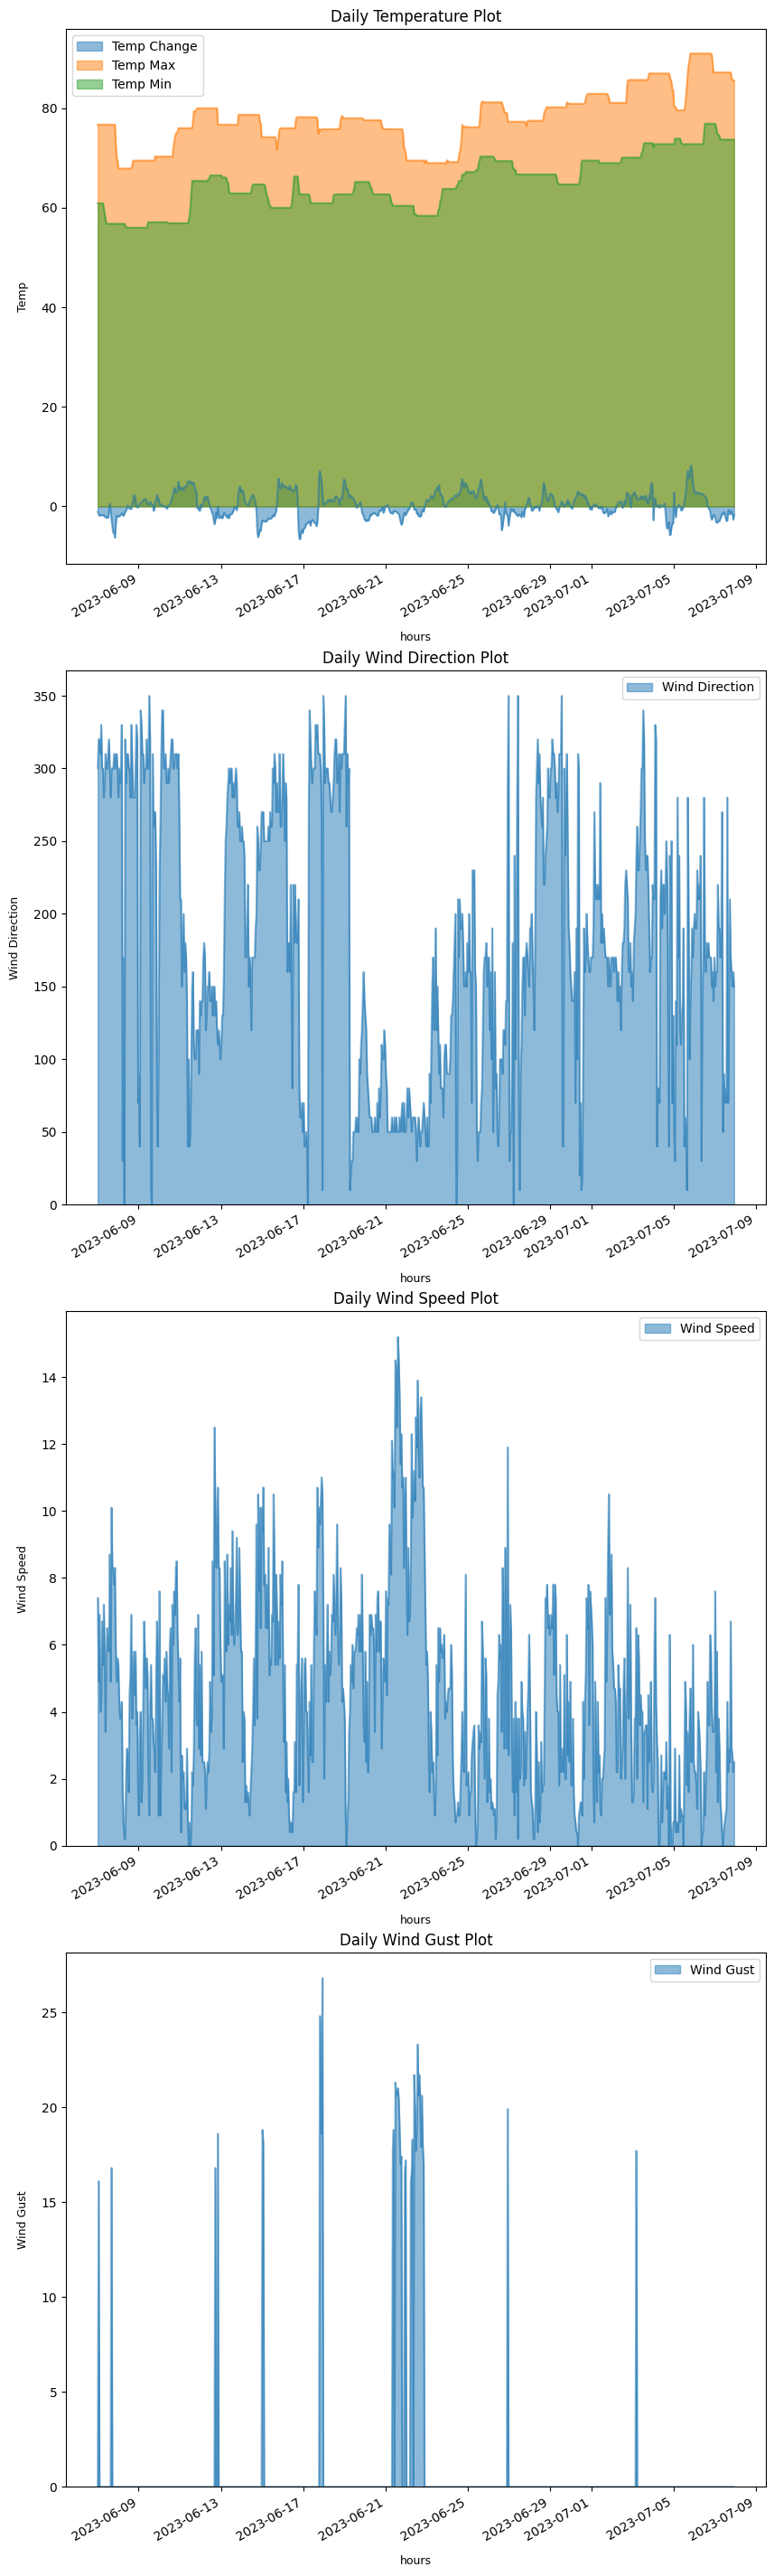

In [4]:
# Format time
dataframe['hours'] = pd.to_datetime(dataframe['validTimeUtc'])
# Create a dataframe of HOD weather parameter
combined_df = pd.DataFrame(dataframe[['hours', 'temperatureChange24Hour', 'temperatureMax24Hour', 'temperatureMin24Hour', 'windDirection', 'windSpeed', 'windGust']]).set_index('hours')

# Create plots for temperature
plot_pcombined_df_temp=pd.DataFrame()
plot_pcombined_df_temp['Temp Change'] = combined_df['temperatureChange24Hour'].fillna(0)
plot_pcombined_df_temp['Temp Max'] = combined_df['temperatureMax24Hour'].fillna(0)
plot_pcombined_df_temp['Temp Min'] = combined_df['temperatureMin24Hour'].fillna(0)

# Create plots for wind direction
plot_pcombined_df_wind_dir=pd.DataFrame()
plot_pcombined_df_wind_dir['Wind Direction'] = combined_df['windDirection'].fillna(0)

# Create plots for wind Speed
plot_pcombined_df_wind_spd=pd.DataFrame()
plot_pcombined_df_wind_spd['Wind Speed'] = combined_df['windSpeed'].fillna(0)

# Create plots for wind Gust
plot_pcombined_df_wind_gst=pd.DataFrame()
plot_pcombined_df_wind_gst['Wind Gust'] = combined_df['windGust'].fillna(0)

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,40))

axes[0].set_xlabel('Hours', labelpad=10, fontsize=9)
axes[0].set_ylabel('Temp', labelpad=10, fontsize=9)
axes[0].title.set_text('Daily Temperature Plot')

axes[1].set_xlabel('Hours', labelpad=10, fontsize=9)
axes[1].set_ylabel('Wind Direction', labelpad=10, fontsize=9)
axes[1].title.set_text('Daily Wind Direction Plot')

axes[2].set_xlabel('Hours', labelpad=10, fontsize=9)
axes[2].set_ylabel('Wind Speed', labelpad=10, fontsize=9)
axes[2].title.set_text('Daily Wind Speed Plot')

axes[3].set_xlabel('Hours', labelpad=10, fontsize=9)
axes[3].set_ylabel('Wind Gust', labelpad=10, fontsize=9)
axes[3].title.set_text('Daily Wind Gust Plot')

# Add DataFrames to subplots
plot_pcombined_df_temp.plot(kind='area', stacked=False, ax=axes[0])
plot_pcombined_df_wind_dir.plot(kind='area', stacked=False, ax=axes[1])
plot_pcombined_df_wind_spd.plot(kind='area', stacked=False, ax=axes[2])
plot_pcombined_df_wind_gst.plot(kind='area', stacked=False, ax=axes[3])


### Understanding the sample:

<b>Code:</b>
The code basically is using the History on Demand (HOD) Direct APIs endpoint to query the hourly weather data for specific dates.
After creating the necessary API Credentials, a HTTP Get Request is created with query parameters and headers. The headers are the credentials, while the query parameters are geocode cordinates, start and end time for the weather data to be queries, format of output, units and compact.

The response of the History on Demand (HOD) Direct APIs endpoint query is the json data, that is transformed into dataframe for easy data intepretation and graphical display. 

<b>Output:</b>
The Output of the query to History on Demand (HOD) Direct APIs is a JSON response that is converted to a dataframe. As an example, a graphical area plot display is shown to exhibit the hourly temeparature variation of the date range given in the query. On the same lines, we can plot various weather parameters like wind speed etc. 

The graphical display consists of 4 graphs, that shows temperature variations, wind direction, wind speed and wint gust for specific data range on x axis. Note this data is an hourly data.

For more details on History on Demand (HOD) Direct APIs refer - [HOD Direct API Developer Guide](https://developer.ibm.com/apis/catalog/envintelsuite--ibm-environmental-intelligence/HoD+Direct+API+Developer+Guide) and [HOD Direct and Archive Common Information](https://developer.ibm.com/apis/catalog/envintelsuite--ibm-environmental-intelligence/HoD+Direct+and+Archive+-+Common+Information)

